In [2]:
%%bash
git clone https://github.com/ZhuoqunWang0120/cs671kaggle.git

Cloning into 'cs671kaggle'...


In [23]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV


In [4]:
os.chdir('./cs671kaggle')

In [5]:
train_data = pd.read_csv('data/train.csv')
train_data = train_data.dropna()
# drop id
train_data = train_data.drop(columns = 'id')
# transform age to age groups
train_data.Age = list(map(lambda s: s[0], train_data.Age.astype('str')))
# transform dtype of temperature
train_data.Temperature = train_data.Temperature.astype('float')
# one-hot encoding
train_data = pd.get_dummies(train_data,dummy_na=False)

In [6]:
Xtrain, ytrain = train_data.drop(columns = 'Decision'), train_data.Decision

In [7]:
clf = RidgeClassifier(random_state = 0)
params = {'alpha': np.arange(0.01, 100, 1)}

In [8]:
ridge_cv = GridSearchCV(
    estimator = clf, 
    param_grid = params,
    scoring='accuracy',
    cv = 5, 
    verbose = True)

In [9]:
ridge_cv.fit(Xtrain, ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=RidgeClassifier(random_state=0),
             param_grid={'alpha': array([1.000e-02, 1.010e+00, 2.010e+00, 3.010e+00, 4.010e+00, 5.010e+00,
       6.010e+00, 7.010e+00, 8.010e+00, 9.010e+00, 1.001e+01, 1.101e+01,
       1.201e+01, 1.301e+01, 1.401e+01, 1.501e+01, 1.601e+01, 1.701e+01,
       1.801e+01, 1.901e+01, 2.001e+01, 2.101e+01, 2.201e+01, 2.301e+01,
       2.401e+01, 2.501e+01, 2.6...
       6.601e+01, 6.701e+01, 6.801e+01, 6.901e+01, 7.001e+01, 7.101e+01,
       7.201e+01, 7.301e+01, 7.401e+01, 7.501e+01, 7.601e+01, 7.701e+01,
       7.801e+01, 7.901e+01, 8.001e+01, 8.101e+01, 8.201e+01, 8.301e+01,
       8.401e+01, 8.501e+01, 8.601e+01, 8.701e+01, 8.801e+01, 8.901e+01,
       9.001e+01, 9.101e+01, 9.201e+01, 9.301e+01, 9.401e+01, 9.501e+01,
       9.601e+01, 9.701e+01, 9.801e+01, 9.901e+01])},
             scoring='accuracy', verbose=True)

In [10]:
print(ridge_cv.best_score_, ridge_cv.best_params_)

0.6882021553017046 {'alpha': 74.01}


In [32]:
%%time
ridge_final = RidgeClassifier(**ridge_cv.best_params_).fit(Xtrain, ytrain)

CPU times: user 50.1 ms, sys: 10.8 ms, total: 60.8 ms
Wall time: 61.1 ms


In [33]:
np.mean(cross_val_score(RidgeClassifier(**ridge_cv.best_params_), Xtrain, ytrain, cv = 5, scoring = 'accuracy'))

0.6882021553017046

In [34]:
import pickle
with open('ridge.pkl','wb') as f1:
    pickle.dump(ridge_final,f1)

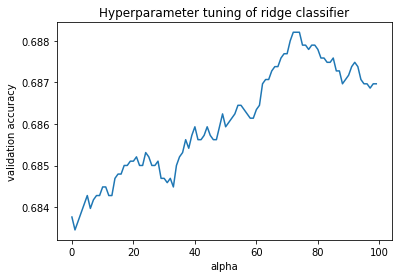

In [30]:
plt.plot(np.array(ridge_cv.cv_results_['param_alpha'], dtype = float), ridge_cv.cv_results_['mean_test_score'])
plt.title('Hyperparameter tuning of ridge classifier')
plt.xlabel('alpha')
plt.ylabel('validation accuracy')
pass